<a href="https://colab.research.google.com/github/hadeswithming23/DeepLearning/blob/main/GroupG_DLI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Libraries

In [3]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Pandas display options
pd.set_option("display.float_format", "{:.3f}".format)

# Matplotlib defaults
plt.rcParams.update({
    "figure.figsize": (10, 6),
    "axes.grid": True,       # makes plots more readable
    "grid.alpha": 0.3        # subtle grid lines
})

# 2. Read Dataset

In [4]:
# Load dataset
raw_df = pd.read_csv("https://raw.githubusercontent.com/hadeswithming23/DeepLearning/main/KDDTrain%2B.txt")

# Create a working copy to avoid modifying the raw data
df = raw_df.copy(deep=True)

# Preview the first rows
df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.070,0.070,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21


## 2.1 Add Columns Names

In [5]:
# Define column names for the KDD dataset
columns = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in",
    "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations",
    "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login",
    "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate",
    "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate",
    "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate", "dst_host_srv_serror_rate",
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate",
    "attack", "level"
]

# Load dataset with column names directly
df = pd.read_csv("https://raw.githubusercontent.com/hadeswithming23/DeepLearning/main/KDDTrain%2B.txt", names=columns)

# Preview
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.170,0.030,0.170,0.000,0.000,0.000,0.050,0.000,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21


## 2.2 Dataset Insights

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [7]:
# Statistical summary
print("\nSummary stats:")
print(df.describe().T)


Summary stats:
                                 count      mean         std   min    25%  \
duration                    125973.000   287.145    2604.515 0.000  0.000   
src_bytes                   125973.000 45566.743 5870331.182 0.000  0.000   
dst_bytes                   125973.000 19779.114 4021269.151 0.000  0.000   
land                        125973.000     0.000       0.014 0.000  0.000   
wrong_fragment              125973.000     0.023       0.254 0.000  0.000   
urgent                      125973.000     0.000       0.014 0.000  0.000   
hot                         125973.000     0.204       2.150 0.000  0.000   
num_failed_logins           125973.000     0.001       0.045 0.000  0.000   
logged_in                   125973.000     0.396       0.489 0.000  0.000   
num_compromised             125973.000     0.279      23.942 0.000  0.000   
root_shell                  125973.000     0.001       0.037 0.000  0.000   
su_attempted                125973.000     0.001       0.045

# 3.0 Data Cleaning

## 3.1 Null Values

In [ ]:
print("Missing values:\n", df.isnull().sum().sum())

Missing values:
 0


## 3.2 Duplicates

In [ ]:
# Display duplicate rows (if any)
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}")

if not duplicates.empty:
    display(duplicates.head())

Number of duplicate rows: 0


## 3.3 Outliers

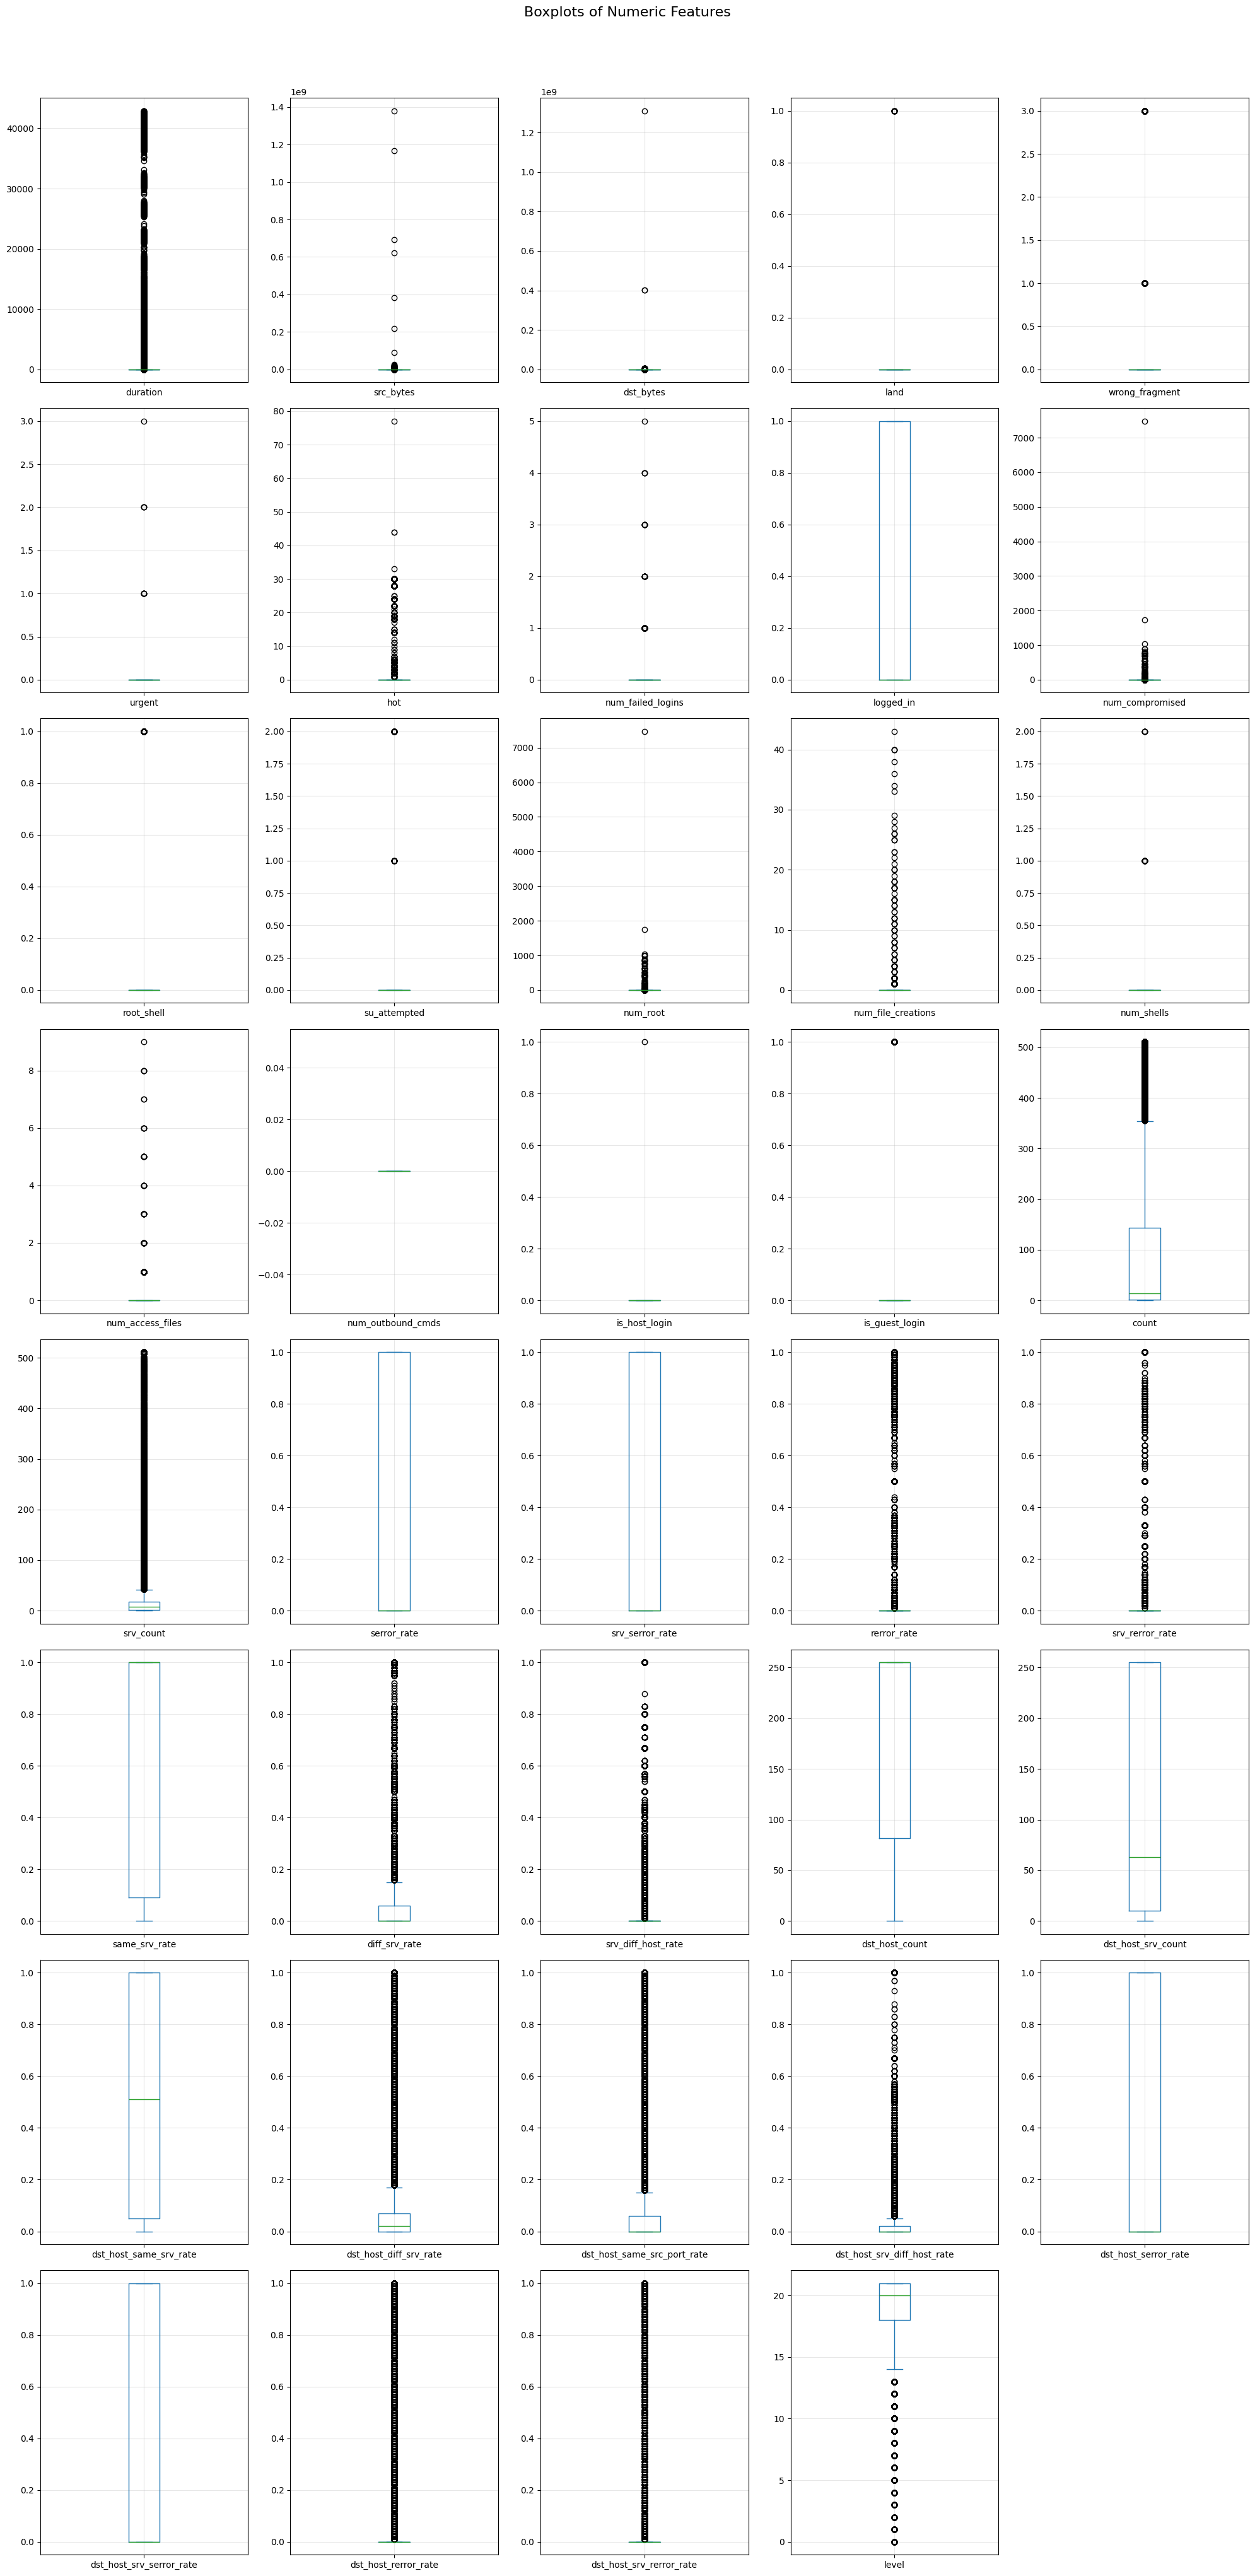

In [ ]:
# Boxplots for all numerical features
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

df[numeric_cols].plot(
    kind="box",
    subplots=True,
    layout=(len(numeric_cols)//5 + 1, 5),  # auto-adjust rows
    figsize=(20, 40),
    sharex=False,
    sharey=False
)

plt.suptitle("Boxplots of Numeric Features", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


## 3.4 Classifying Attacks In "attack" Column Into attack Or normal

In [ ]:
df['attack'] = np.where(df['attack'] == "normal", "normal", "attack")

df['attack'].unique()

array(['normal', 'attack'], dtype=object)

# 4.0 EDA - Visualisations

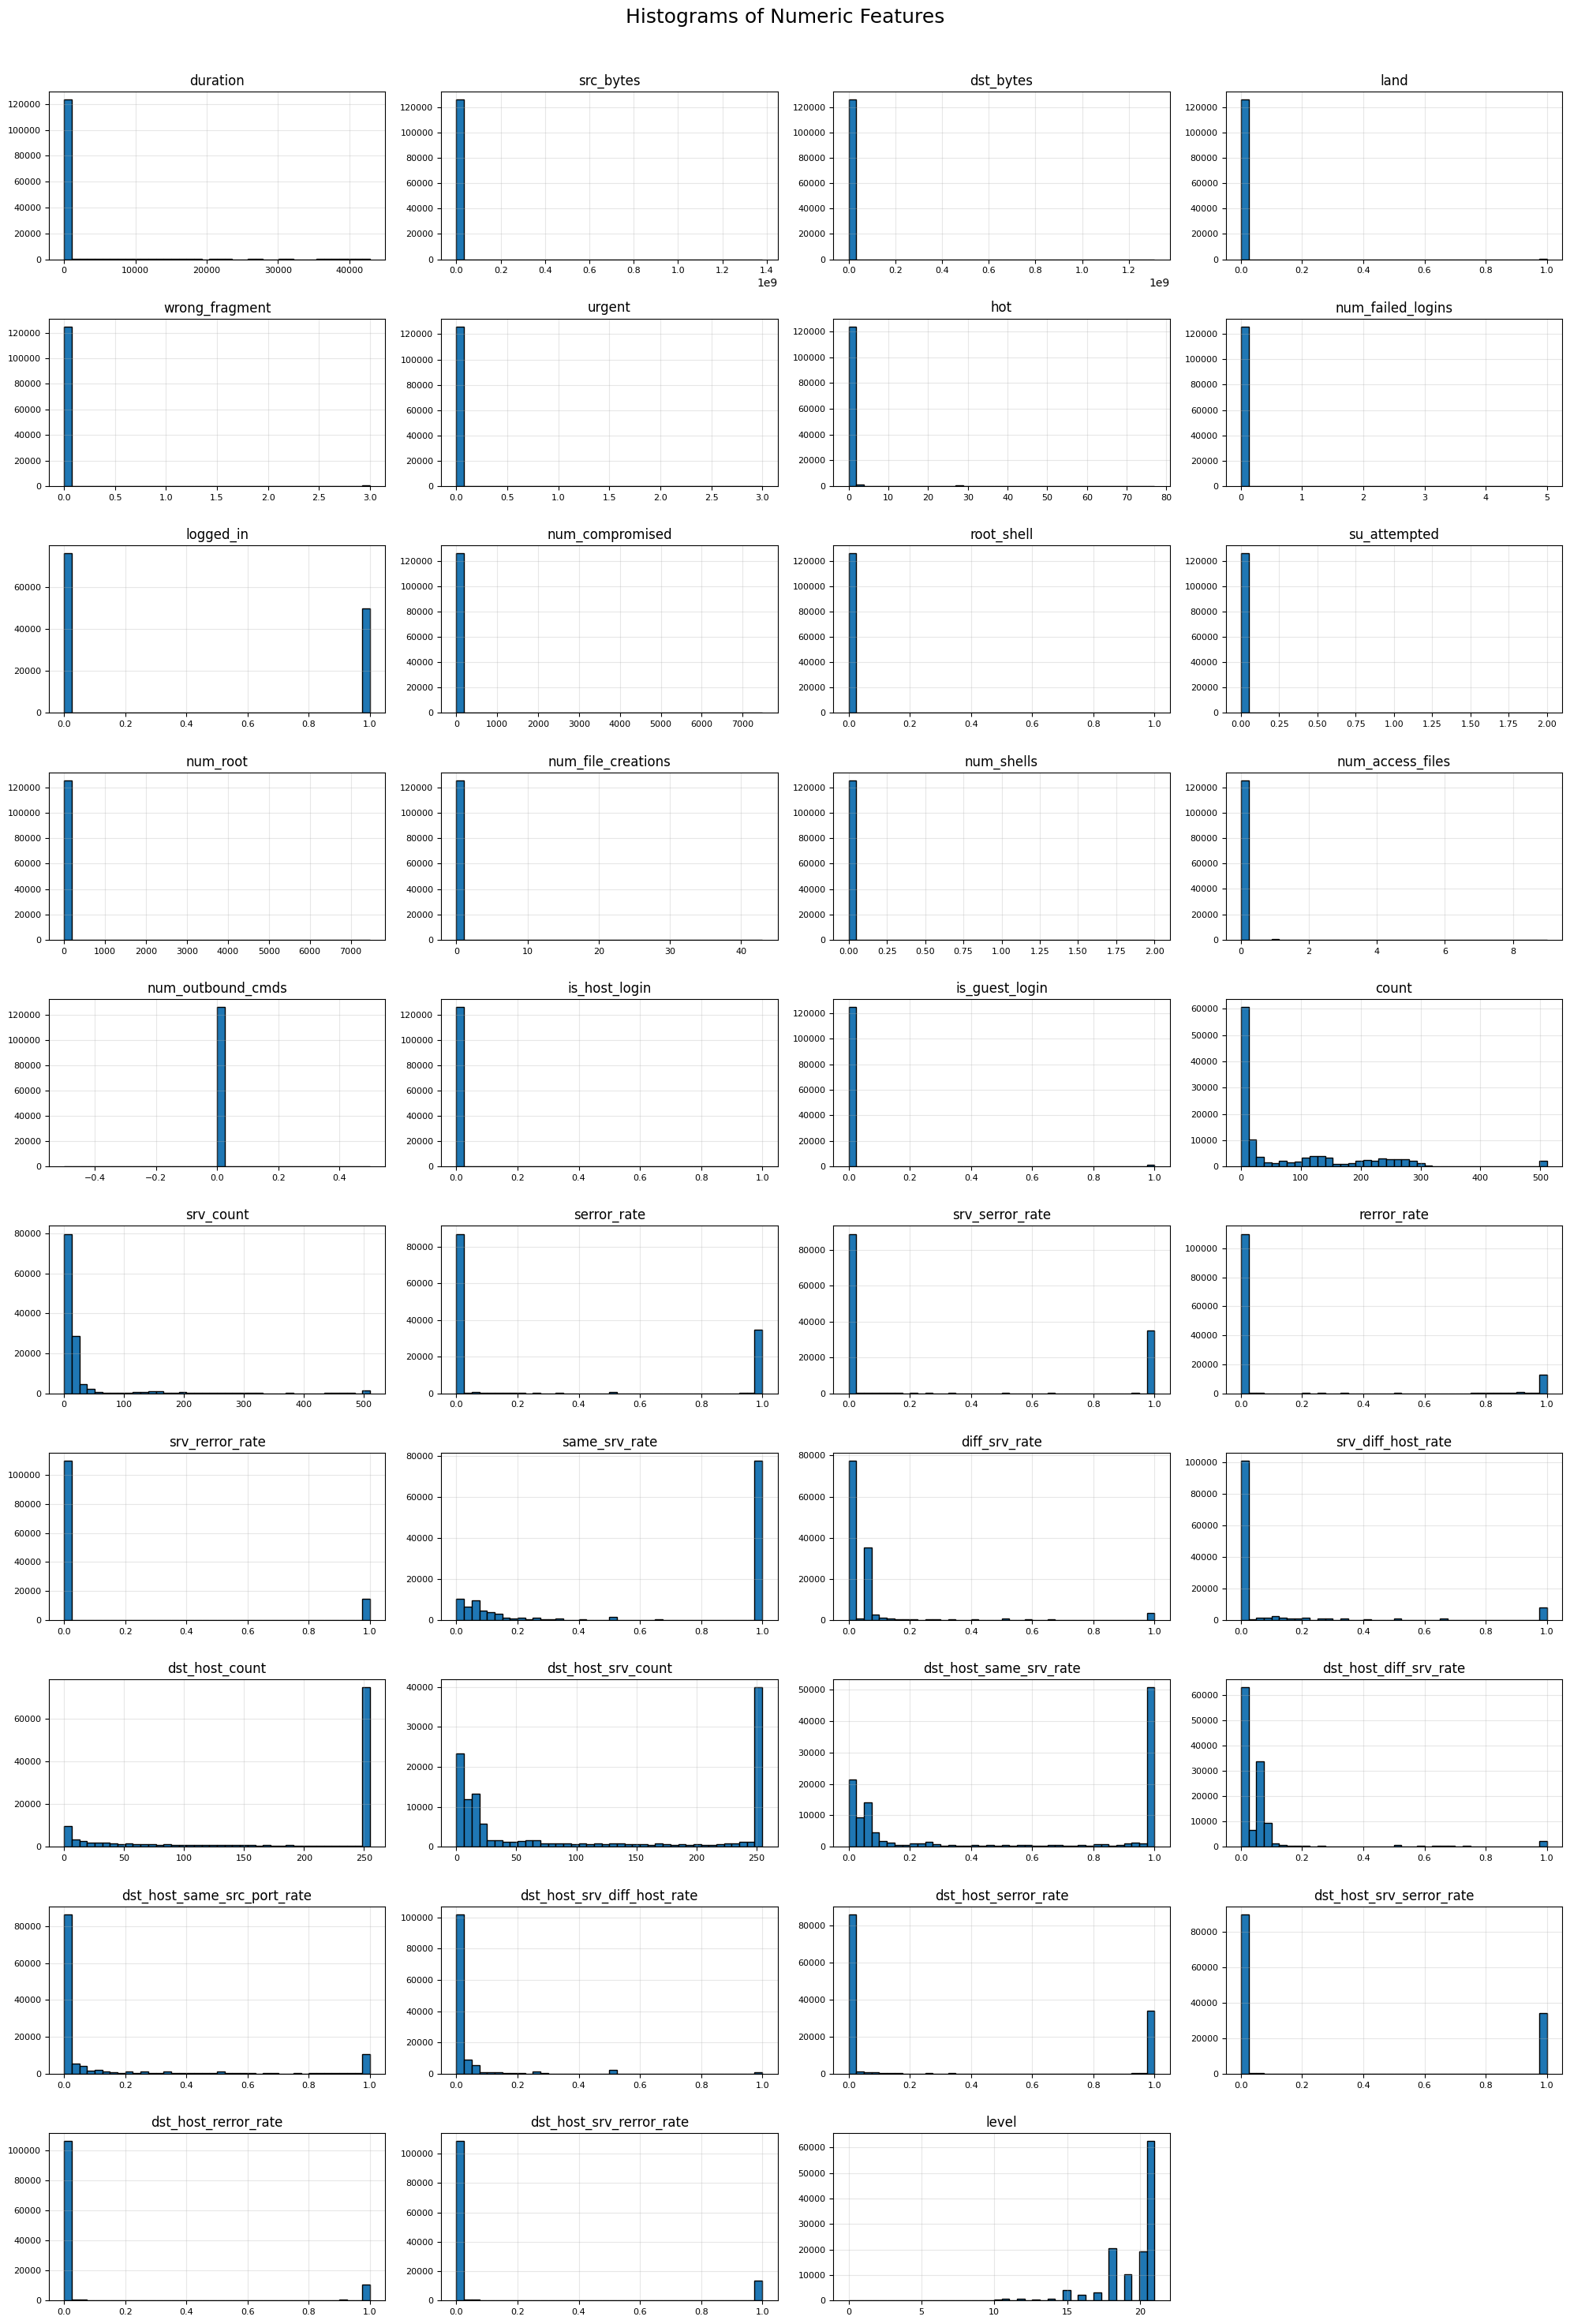

In [ ]:
# Histograms for all numeric features
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

df[numeric_cols].hist(
    bins=40,             # number of bins
    figsize=(20, 30),    # figure size
    edgecolor="black",   # better visibility
    layout=(len(numeric_cols)//4 + 1, 4),  # auto layout in 4 columns
    xlabelsize=8, ylabelsize=8
)

plt.suptitle("Histograms of Numeric Features", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


## 4.1 Target Variable Distribution

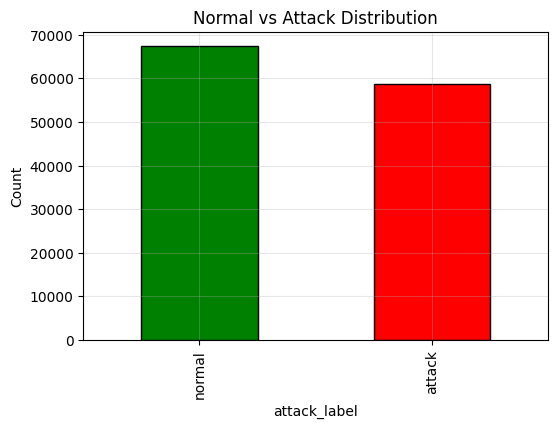


Attack types distribution:
attack
normal    67343
attack    58630
Name: count, dtype: int64


In [ ]:
plot_df = df.copy()
plot_df['attack_label'] = df['attack'].apply(lambda x: "normal" if x == "normal" else "attack")

plt.figure(figsize=(6,4))
plot_df['attack_label'].value_counts().plot(kind="bar", color=["green","red"], edgecolor="black")
plt.title("Normal vs Attack Distribution")
plt.ylabel("Count")
plt.show()

print("\nAttack types distribution:")
print(df['attack'].value_counts().head(10))

## 4.2 Protocol, Service, Flag Analysis

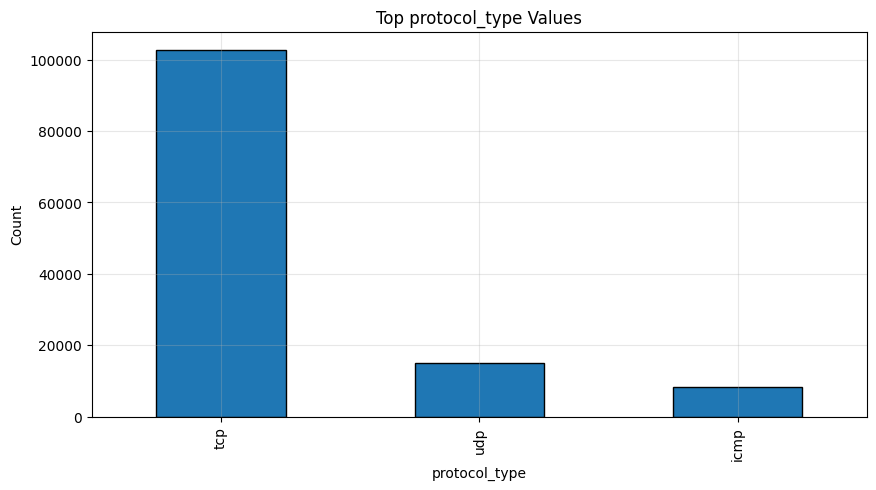

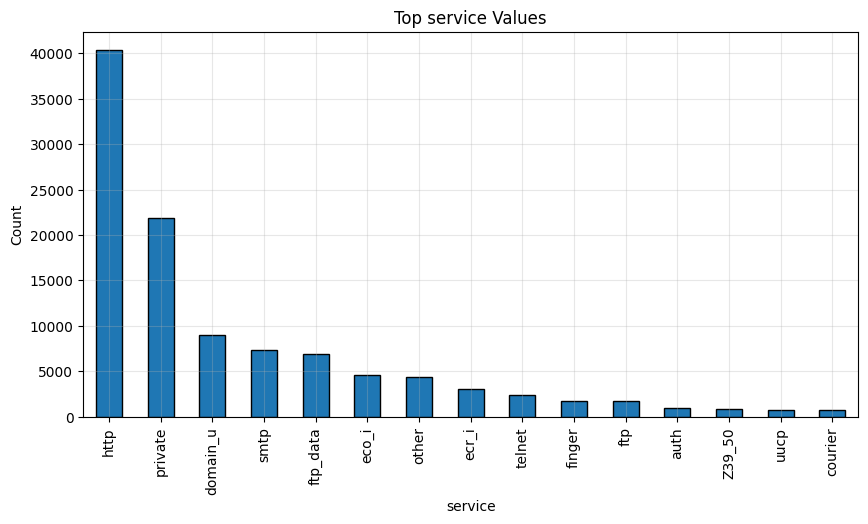

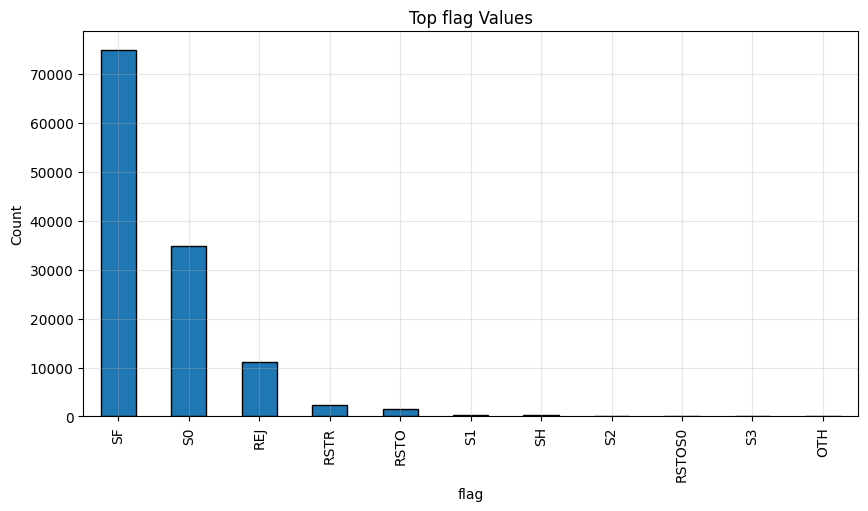

In [ ]:
categorical_cols = ['protocol_type', 'service', 'flag']

for col in categorical_cols:
    plt.figure(figsize=(10,5))
    df[col].value_counts().head(15).plot(kind="bar", edgecolor="black")
    plt.title(f"Top {col} Values")
    plt.ylabel("Count")
    plt.show()

## 4.3 Attack vs Normal by Protocol

<Figure size 800x500 with 0 Axes>

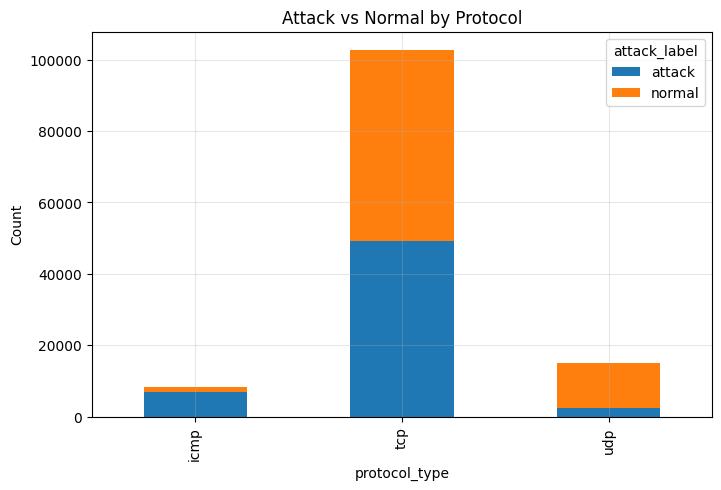

In [ ]:
plt.figure(figsize=(8,5))
pd.crosstab(plot_df['protocol_type'], plot_df['attack_label']).plot(kind="bar", stacked=True, figsize=(8,5))
plt.title("Attack vs Normal by Protocol")
plt.ylabel("Count")
plt.show()

## 4.4 Feature Behavior for Attacks



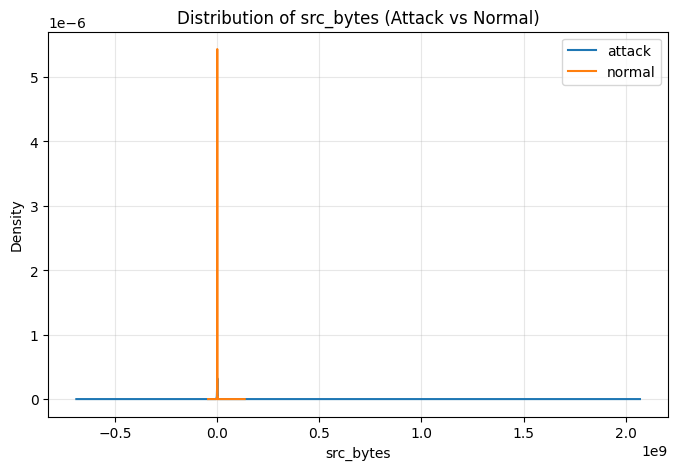

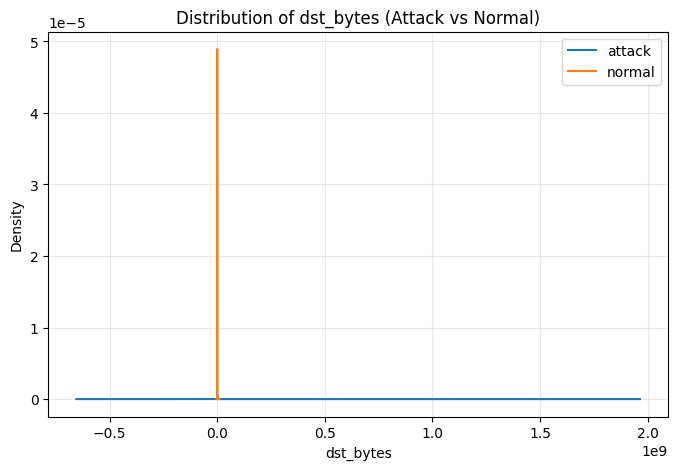

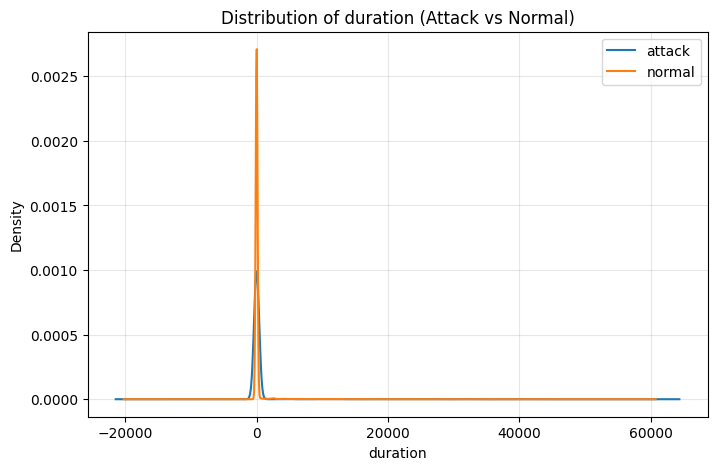

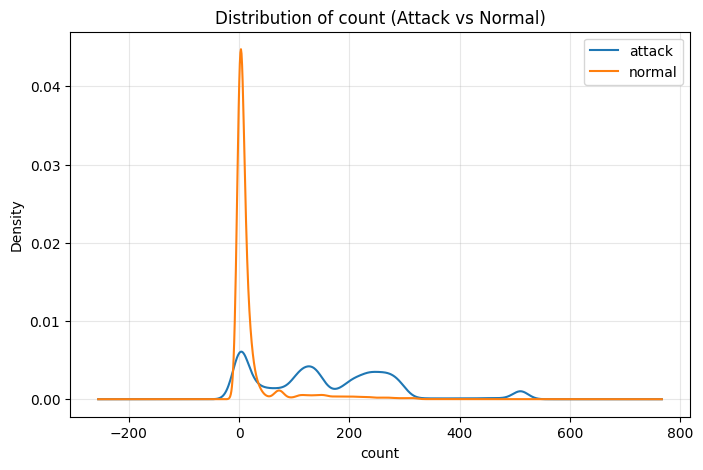

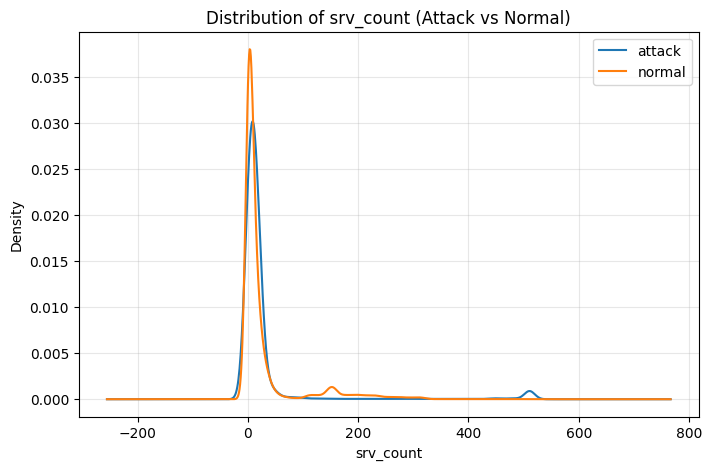

In [ ]:
numeric_cols = ['src_bytes','dst_bytes','duration','count','srv_count']

for col in numeric_cols:
    plt.figure(figsize=(8,5))
    plot_df.groupby('attack_label')[col].plot(kind="kde", legend=True)
    plt.title(f"Distribution of {col} (Attack vs Normal)")
    plt.xlabel(col)
    plt.show()

## 4.5 Correlation Heatmap (Key Features)

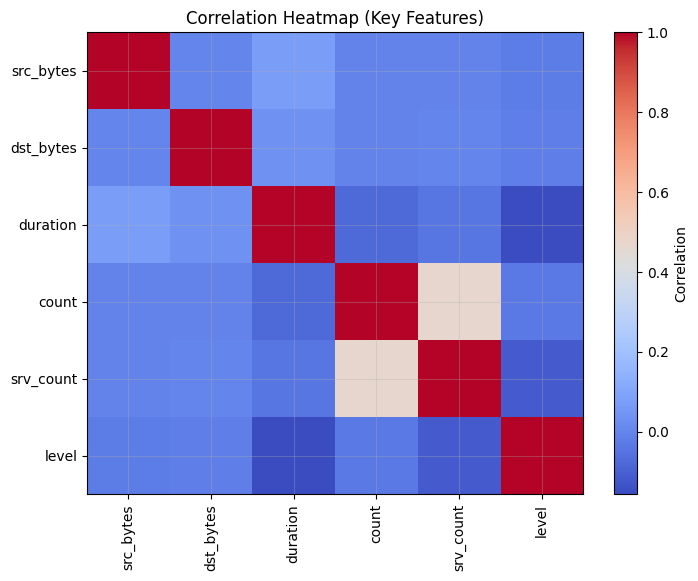

In [ ]:
corr = df[numeric_cols + ['level']].corr()
plt.figure(figsize=(8,6))
plt.imshow(corr, cmap="coolwarm", aspect="auto")
plt.colorbar(label="Correlation")
plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(np.arange(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap (Key Features)")
plt.show()

# 5.0 Data Preprocessing

## 5.1 Encode Target Variable

In [8]:
from sklearn.preprocessing import LabelEncoder

# Attack: normal=0, attack=1
le = LabelEncoder()
df['attack_binary'] = le.fit_transform(df['attack'].apply(lambda x: "normal" if x == "normal" else "attack"))

## 5.2 Encode Categorical Features

In [9]:
# One-Hot for protocol_type and flag (small categories)
df = pd.get_dummies(df, columns=['protocol_type', 'flag'], drop_first=True)

# Frequency Encoding for service (many categories)
service_counts = df['service'].value_counts().to_dict()
df['service_encoded'] = df['service'].map(service_counts)
df = df.drop(columns=['service'])

## 5.3 Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['attack','attack_binary'])  # features
y = df['attack_binary']                           # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (88181, 52)
Test shape: (37792, 52)


## 5.4 Feature Engineering: Mutual Information

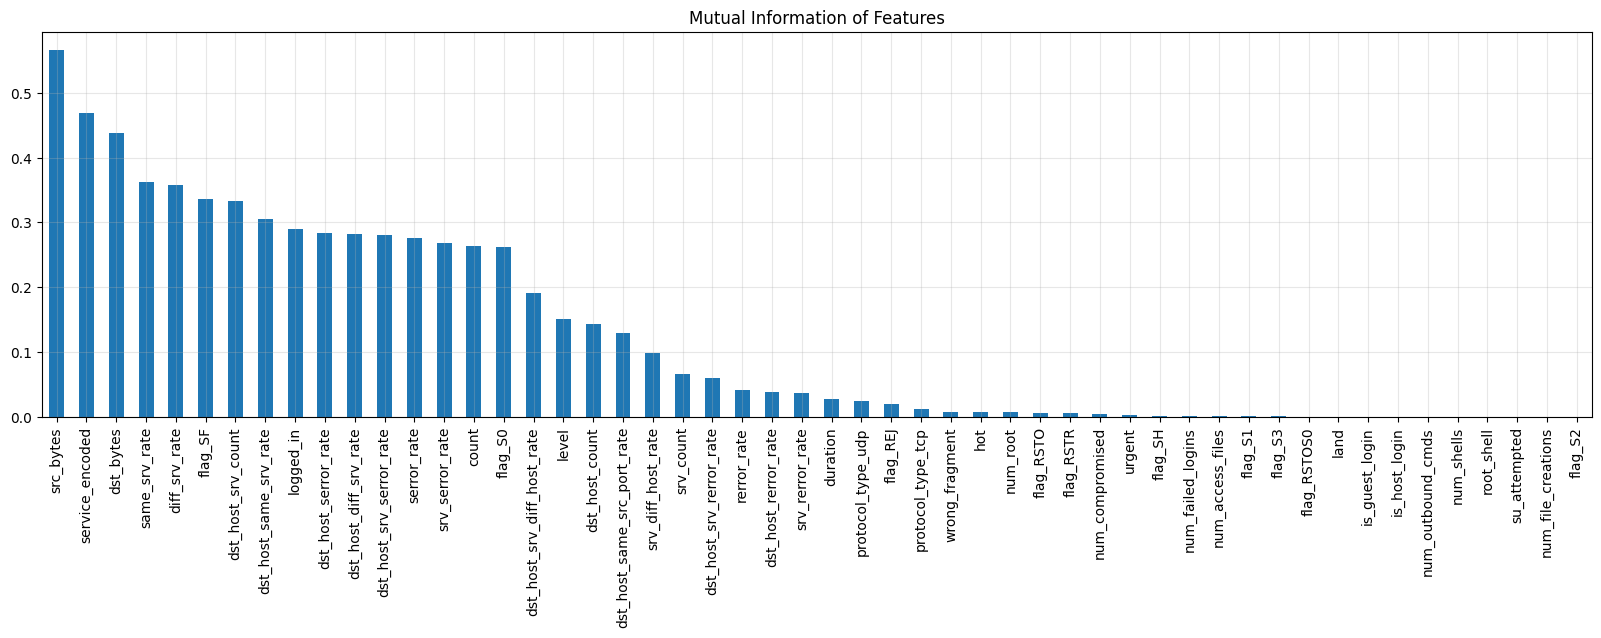

Top features by mutual information:

src_bytes                     0.566
service_encoded               0.470
dst_bytes                     0.438
same_srv_rate                 0.363
diff_srv_rate                 0.357
flag_SF                       0.336
dst_host_srv_count            0.333
dst_host_same_srv_rate        0.306
logged_in                     0.290
dst_host_serror_rate          0.284
dst_host_diff_srv_rate        0.282
dst_host_srv_serror_rate      0.280
serror_rate                   0.277
srv_serror_rate               0.268
count                         0.264
flag_S0                       0.262
dst_host_srv_diff_host_rate   0.191
level                         0.151
dst_host_count                0.143
dst_host_same_src_port_rate   0.130
dtype: float64


In [11]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt

# Calculate mutual information scores
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info, index=X_train.columns)

# Sort and plot
mutual_info = mutual_info.sort_values(ascending=False)
plt.figure(figsize=(20, 5))
mutual_info.plot(kind="bar")
plt.title("Mutual Information of Features")
plt.show()

# Display top features
print("Top features by mutual information:\n")
print(mutual_info.head(20))

## 5.5 Feature Selection: SelectKBest

In [12]:
from sklearn.feature_selection import SelectKBest

# Select top k features
k = 30
selector = SelectKBest(mutual_info_classif, k=k)
selector.fit(X_train, y_train)

selected_features = X_train.columns[selector.get_support()]
print(f"\nSelected Top {k} Features:\n", list(selected_features))

# For modeling, keep only top 15 features (to balance size vs. performance)
top_n = 15
selected_features_final = list(selected_features[:top_n])
print(f"\nUsing Top {top_n} Features:\n", selected_features_final)

# Reduce train/test sets
X_train_sel = X_train[selected_features_final]
X_test_sel = X_test[selected_features_final]


Selected Top 30 Features:
 ['duration', 'src_bytes', 'dst_bytes', 'logged_in', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'level', 'protocol_type_tcp', 'protocol_type_udp', 'flag_REJ', 'flag_S0', 'flag_SF', 'service_encoded']

Using Top 15 Features:
 ['duration', 'src_bytes', 'dst_bytes', 'logged_in', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count']


## 5.6 Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_sel)
X_test_scaled = scaler.transform(X_test_sel)  # Prevents data leakage

print("Final Train Shape:", X_train_scaled.shape)
print("Final Test Shape:", X_test_scaled.shape)

Final Train Shape: (88181, 15)
Final Test Shape: (37792, 15)


# 6.0 Model Builiding

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score

def evaluate_model(model, X_train, y_train, X_test, y_test):
    """Train model, evaluate, and return performance metrics."""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1-Score": f1_score(y_test, y_pred, average="weighted")
    }

    return metrics, classification_report(y_test, y_pred, digits=5), confusion_matrix(y_test, y_pred)

## 6.1 Train Model Ong Chee Zhung TP065314

In [22]:
# ============================
# Hybrid IDS: Train Base Models + GBM Meta-Model
# ============================

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
import joblib
import tensorflow as tf
from tensorflow.keras import layers, models

# -----------------------------
# 0) Preprocess Data
# -----------------------------
num_classes = len(np.unique(y))
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)

print(f"Number of classes: {num_classes}")
print("y_train_cat shape:", y_train_cat.shape)
print("y_test_cat shape:", y_test_cat.shape)

# -----------------------------
# 1) Train CNN
# -----------------------------
X_train_cnn = X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1)
X_test_cnn  = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)

cnn = models.Sequential([
    layers.Conv1D(32, 3, activation="relu", input_shape=(X_train_cnn.shape[1], 1)),
    layers.MaxPooling1D(2),
    layers.Conv1D(64, 3, activation="relu"),
    layers.GlobalMaxPooling1D(),
    layers.Dense(64, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
cnn.fit(X_train_cnn, y_train_cat, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

cnn_train_probs = cnn.predict(X_train_cnn)
cnn_test_probs = cnn.predict(X_test_cnn)

# Save CNN
cnn.save("cnn_model.h5")

# -----------------------------
# 2) Train LSTM
# -----------------------------
X_train_lstm = X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1)
X_test_lstm  = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)

lstm = models.Sequential([
    layers.LSTM(64, input_shape=(X_train_lstm.shape[1], 1)),
    layers.Dense(64, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])
lstm.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
lstm.fit(X_train_lstm, y_train_cat, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

lstm_train_probs = lstm.predict(X_train_lstm)
lstm_test_probs = lstm.predict(X_test_lstm)

# Save LSTM
lstm.save("lstm_model.h5")

# -----------------------------
# 3) Prepare GBM Meta-Model Features
# -----------------------------
meta_features_train = np.hstack([X_train_scaled, cnn_train_probs, lstm_train_probs])
meta_features_test  = np.hstack([X_test_scaled, cnn_test_probs, lstm_test_probs])

# -----------------------------
# 4) Train GBM Meta-Model
# -----------------------------
meta_model = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)
meta_model.fit(meta_features_train, y_train)
stack_preds = meta_model.predict(meta_features_test)

# -----------------------------
# 5) Evaluate Models
# -----------------------------
def evaluate_model(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average="macro"),
        "Recall": recall_score(y_true, y_pred, average="macro"),
        "F1_Score": f1_score(y_true, y_pred, average="macro")
    }

cnn_preds = np.argmax(cnn_test_probs, axis=1)
lstm_preds = np.argmax(lstm_test_probs, axis=1)
avg_test_probs = (cnn_test_probs + lstm_test_probs) / 2.0
avg_preds = np.argmax(avg_test_probs, axis=1)

results_list = [
    evaluate_model(y_test, cnn_preds, "CNN"),
    evaluate_model(y_test, lstm_preds, "LSTM"),
    evaluate_model(y_test, avg_preds, "Ensemble_Avg"),
    evaluate_model(y_test, stack_preds, "Ensemble_GBM")
]

# -----------------------------
# 6) Save Results
# -----------------------------
ong_df = pd.DataFrame(results_list)
print("\n=== Model Comparison Results ===")
print(ong_df)


# -----------------------------
# 7) Save GBM Meta-Model
# -----------------------------
joblib.dump(meta_model, "ong_model.pkl")
print("✅ GBM meta-model saved as ong_model.pkl")


Number of classes: 2
y_train_cat shape: (88181, 2)
y_test_cat shape: (37792, 2)
Epoch 1/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.8957 - loss: 0.2751 - val_accuracy: 0.9476 - val_loss: 0.1452
Epoch 2/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9468 - loss: 0.1445 - val_accuracy: 0.9499 - val_loss: 0.1383
Epoch 3/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9495 - loss: 0.1376 - val_accuracy: 0.9514 - val_loss: 0.1320
Epoch 4/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9511 - loss: 0.1315 - val_accuracy: 0.9558 - val_loss: 0.1265
Epoch 5/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9518 - loss: 0.1311 - val_accuracy: 0.9567 - val_loss: 0.1265
Epoch 6/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9514 - loss: 0.1306 - val_accuracy: 0.9488 - val_loss: 0.1358
Epoch 7/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9528 - loss: 0.1268 - val_accuracy: 0.9567 - val_loss: 0.1258
Epoch 8/10
552/552 ━━━━

Epoch 1/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.8913 - loss: 0.3040 - val_accuracy: 0.9404 - val_loss: 0.1465
Epoch 2/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.9434 - loss: 0.1429 - val_accuracy: 0.9456 - val_loss: 0.1361
Epoch 3/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9502 - loss: 0.1279 - val_accuracy: 0.9539 - val_loss: 0.1211
Epoch 4/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9554 - loss: 0.1198 - val_accuracy: 0.9556 - val_loss: 0.1212
Epoch 5/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9544 - loss: 0.1192 - val_accuracy: 0.9565 - val_loss: 0.1178
Epoch 6/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.9564 - loss: 0.1143 - val_accuracy: 0.9537 - val_loss: 0.1222
Epoch 7/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9570 - loss: 0.1147 - val_accuracy: 0.9582 - val_loss: 0.1133
Epoch 8/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.9574 - loss: 0.1105 - 


=== Model Comparison Results ===
          Model  Accuracy  Precision  Recall  F1_Score
0           CNN     0.953      0.957   0.951     0.953
1          LSTM     0.962      0.964   0.961     0.962
2  Ensemble_Avg     0.961      0.964   0.959     0.961
3  Ensemble_GBM     0.998      0.998   0.998     0.998
✅ GBM meta-model saved as ong_model.pkl


## 6.2 Model Training Russell Chan TP065645




🔹 Results before Hyperparameter Tuning
Accuracy: 0.99806837
Precision: 0.99806842
Recall: 0.99806837
F1_Score: 0.99806834
ROC-AUC: 0.99993927
Fitting 3 folds for each of 162 candidates, totalling 486 fits
✅ Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 128, 'subsample': 1.0}

🔹 Results after Hyperparameter Tuning
Accuracy: 0.99830652
Precision: 0.99830686
Recall: 0.99830652
F1_Score: 0.99830646
ROC-AUC: 0.99995810

Classification Report:

              precision    recall  f1-score   support

           0    0.99869   0.99767   0.99818     17589
           1    0.99797   0.99886   0.99842     20203

    accuracy                        0.99831     37792
   macro avg    0.99833   0.99827   0.99830     37792
weighted avg    0.99831   0.99831   0.99831     37792



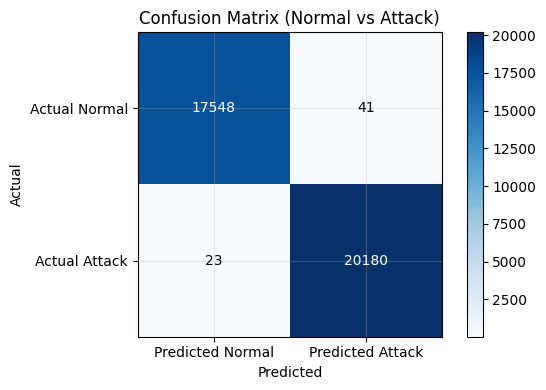

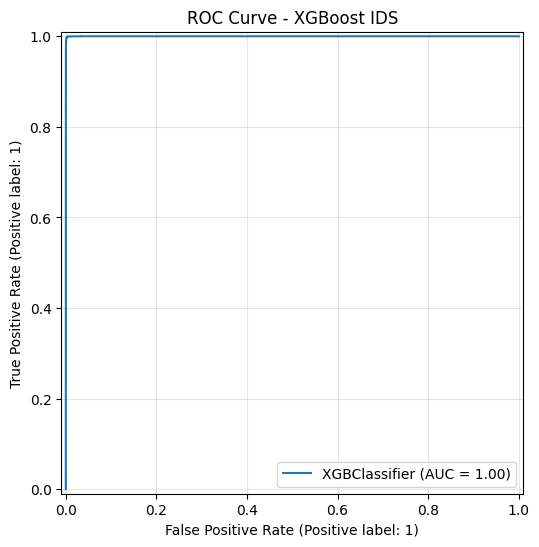


=== Model Comparison ===
          Model  Accuracy  Precision    Recall  F1_Score   ROC-AUC
0  Baseline XGB 0.9980684  0.9980684 0.9980684 0.9980683 0.9999393
1     Tuned XGB 0.9983065  0.9983069 0.9983065 0.9983065 0.9999581
💾 Best tuned XGBoost model saved as russell_model.pkl
Final Train Shape: (88181, 15)
Final Test Shape: (37792, 15)

✅ Accuracy of loaded model: 0.99830652


In [23]:
# ============================
# Hybrid IDS - XGBoost Model
# ============================
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
)
from xgboost import XGBClassifier


# ----------------------------
# Baseline Model (Default XGB)
# ----------------------------
baseline_model = XGBClassifier(random_state=42)
baseline_model.fit(X_train_scaled, y_train)

y_pred_base = baseline_model.predict(X_test_scaled)
y_pred_proba_base = baseline_model.predict_proba(X_test_scaled)[:, 1]

baseline_results = {
    "Model": "Baseline XGB",
    "Accuracy": accuracy_score(y_test, y_pred_base),
    "Precision": precision_score(y_test, y_pred_base, average="weighted"),
    "Recall": recall_score(y_test, y_pred_base, average="weighted"),
    "F1_Score": f1_score(y_test, y_pred_base, average="weighted"),
    "ROC-AUC": roc_auc_score(y_test, y_pred_proba_base)
}

print("\n🔹 Results before Hyperparameter Tuning")
for k, v in baseline_results.items():
    if k != "Model":
        print(f"{k}: {v:.8f}")


# ----------------------------
# GridSearchCV Model (Tuned)
# ----------------------------
param_grid = {
    "n_estimators": [100, 128, 200],
    "max_depth": [4, 6, 8],
    "learning_rate": [0.05, 0.1, 0.2],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0]
}

grid_model = GridSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_grid=param_grid,
    scoring="f1_weighted",   # supports multi-class
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_model.fit(X_train_scaled, y_train)

print(f"✅ Best Parameters: {grid_model.best_params_}")


# ================
# Train Final Model with Best Params
# ================
XGB_model = XGBClassifier(
    colsample_bytree=grid_model.best_params_['colsample_bytree'],
    learning_rate=grid_model.best_params_['learning_rate'],
    max_depth=grid_model.best_params_['max_depth'],
    n_estimators=grid_model.best_params_['n_estimators'],
    subsample=grid_model.best_params_['subsample'],
    random_state=42
)

XGB_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = XGB_model.predict(X_test_scaled)
y_pred_proba = XGB_model.predict_proba(X_test_scaled)

# Metrics
grid_results = {
    "Model": "Tuned XGB",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average="weighted"),
    "Recall": recall_score(y_test, y_pred, average="weighted"),
    "F1_Score": f1_score(y_test, y_pred, average="weighted"),
    "ROC-AUC": roc_auc_score(y_test, y_pred_proba[:, 1])
}

print("\n🔹 Results after Hyperparameter Tuning")
for k, v in grid_results.items():
    if k != "Model":
        print(f"{k}: {v:.8f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, digits=5))


# ================
# Confusion Matrix Plot
# ================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Normal vs Attack)")
plt.colorbar()

classes = ['Normal', 'Attack']
plt.xticks([0, 1], [f'Predicted {cls}' for cls in classes])
plt.yticks([0, 1], [f'Actual {cls}' for cls in classes])

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()


# ================
# ROC Curve Plot
# ================
RocCurveDisplay.from_estimator(XGB_model, X_test_scaled, y_test)
plt.title("ROC Curve - XGBoost IDS")
plt.show()


# ----------------------------
# Combine Results
# ----------------------------
russell_df = pd.DataFrame([baseline_results, grid_results])

pd.set_option('display.float_format', '{:.7f}'.format)
print("\n=== Model Comparison ===")
print(russell_df)
pd.set_option('display.float_format', '{:.3f}'.format)


# ----------------------------
# Save best model
# ----------------------------
joblib.dump(XGB_model, "russell_model.pkl")
print("💾 Best tuned XGBoost model saved as russell_model.pkl")

print("Final Train Shape:", X_train_scaled.shape)
print("Final Test Shape:", X_test_scaled.shape)


# ----------------------------
# Load and Evaluate Model
# ----------------------------
loaded_model = joblib.load("russell_model.pkl")
y_pred_loaded = loaded_model.predict(X_test_scaled)  # ✅ Use scaled test data

accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
print(f"\n✅ Accuracy of loaded model: {accuracy_loaded:.8f}")

## 6.3 Low Sze Shun TP065472

In [38]:
# Optimized Decision Tree + LightGBM Ensemble Training
import numpy as np
import pandas as pd
import joblib, time
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingClassifier
from scipy.stats import randint, uniform

print("="*60)
print("Optimized DT + LightGBM Ensemble Training".center(60))
print("="*60)

# -------------------------------
# Utility: Train + Evaluate Model
# -------------------------------
def evaluate_model(model, X_train, y_train, X_test, y_test):
    start = time.time()
    model.fit(X_train, y_train)
    elapsed = time.time() - start
    preds = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds, average="weighted", zero_division=0),
        "Recall": recall_score(y_test, preds, average="weighted", zero_division=0),
        "F1-Score": f1_score(y_test, preds, average="weighted", zero_division=0),
        "Training_Time": elapsed
    }, model

# -------------------------------
# Class weights for imbalance
# -------------------------------
classes = np.unique(y_train)
weights = compute_class_weight("balanced", classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, weights))

# -------------------------------
# Step 1: Base DT
# -------------------------------
dt_base = DecisionTreeClassifier(
    random_state=42,
    class_weight="balanced",
    max_depth=25,
    min_samples_split=10,
    min_samples_leaf=5,
    criterion="gini"
)
dt_metrics, dt_fitted = evaluate_model(dt_base, X_train_scaled, y_train, X_test_scaled, y_test)

# Print Base DT Metrics
print("\n=== Base Decision Tree Results ===")
for k, v in dt_metrics.items():
    if k != "Training_Time":
        print(f"{k}: {v:.8f}")
    else:
        print(f"{k}: {v:.8f}s")

# -------------------------------
# Step 2: LightGBM Tuning (smaller search for speed)
# -------------------------------
param_dist = {
    "num_leaves": randint(50, 150),
    "max_depth": randint(6, 12),
    "learning_rate": uniform(0.01, 0.1),
    "n_estimators": randint(300, 800),
    "min_child_samples": randint(10, 40),
    "subsample": uniform(0.7, 0.3),
    "colsample_bytree": uniform(0.6, 0.4),
}

lgb_base = lgb.LGBMClassifier(
    objective="binary",
    class_weight=class_weight_dict,
    boosting_type="gbdt",
    random_state=42,
    n_jobs=-1,
    verbose=-1
)

search = RandomizedSearchCV(
    lgb_base,
    param_distributions=param_dist,
    n_iter=10,   # reduced from 40 → much faster
    scoring="f1_weighted",
    cv=2,        # reduce CV folds from 3 → faster
    n_jobs=-1,
    random_state=42,
    verbose=0
)

search.fit(X_train_scaled, y_train)
best_params = search.best_params_

print("\n=== Best Hyperparameters Found ===")
print(f"Best CV Score (F1-weighted): {search.best_score_:.8f}")
print("Best Parameters:")
for param, value in best_params.items():
    if isinstance(value, float):
        print(f"  {param}: {value:.6f}")
    else:
        print(f"  {param}: {value}")

# -------------------------------
# Step 3: Train final LightGBM
# -------------------------------
lgb_final = lgb.LGBMClassifier(
    objective="binary",
    class_weight=class_weight_dict,
    boosting_type="gbdt",
    random_state=42,
    n_jobs=-1,
    verbose=-1,
    **best_params
)
lgb_metrics, lgb_fitted = evaluate_model(lgb_final, X_train_scaled, y_train, X_test_scaled, y_test)

# Print Hypertuned LightGBM Metrics
print("\n=== Hypertuned LightGBM Results ===")
for k, v in lgb_metrics.items():
    if k != "Training_Time":
        print(f"{k}: {v:.8f}")
    else:
        print(f"{k}: {v:.8f}s")

# -------------------------------
# Step 4: Ensemble
# -------------------------------
ensemble = VotingClassifier(
    estimators=[("dt", dt_fitted), ("lgb", lgb_fitted)],
    voting="soft",
    weights=[1, 2]
)
ens_metrics, ens_fitted = evaluate_model(ensemble, X_train_scaled, y_train, X_test_scaled, y_test)

print("\n=== Ensemble Results ===")
for k, v in ens_metrics.items():
    if k != "Training_Time":
        print(f"{k}: {v:.8f}")
    else:
        print(f"{k}: {v:.8f}s")

# --- NEW: Print classification report for ensemble ---
ens_preds = ens_fitted.predict(X_test_scaled)
print("\n=== Ensemble Model Classification Report ===")
print(classification_report(y_test, ens_preds, zero_division=0))

# Get predictions from the ensemble model
ensemble_preds = ens_fitted.predict(X_test_scaled)

# Generate confusion matrix
cm = confusion_matrix(y_test, ensemble_preds)

# Print confusion matrix in a clean format
print("\n=== Confusion Matrix ===")
print(f"{'':>8} {'Class 0':>8} {'Class 1':>8}")
for i, row in enumerate(cm):
    print(f"Class {i}  {row[0]:>8} {row[1]:>8}")


# -------------------------------
# Create DataFrame with all 3 models' metrics
# -------------------------------
low_df = pd.DataFrame({
    'Model': ['Base Decision Tree', 'Hypertuned LightGBM', 'Ensemble (DT + LGBM)'],
    'Accuracy': [dt_metrics['Accuracy'], lgb_metrics['Accuracy'], ens_metrics['Accuracy']],
    'Precision': [dt_metrics['Precision'], lgb_metrics['Precision'], ens_metrics['Precision']],
    'Recall': [dt_metrics['Recall'], lgb_metrics['Recall'], ens_metrics['Recall']],
    'F1-Score': [dt_metrics['F1-Score'], lgb_metrics['F1-Score'], ens_metrics['F1-Score']],
    'Training_Time': [dt_metrics['Training_Time'], lgb_metrics['Training_Time'], ens_metrics['Training_Time']]
})

print("\n=== All Models Comparison (low_df) ===")
print(low_df.round(8))

# -------------------------------
# Determine the best model based on accuracy and F1-score
# -------------------------------
models_comparison = {
    'Base Decision Tree': {'accuracy': dt_metrics['Accuracy'], 'f1': dt_metrics['F1-Score'], 'model': dt_fitted},
    'Hypertuned LightGBM': {'accuracy': lgb_metrics['Accuracy'], 'f1': lgb_metrics['F1-Score'], 'model': lgb_fitted},
    'Ensemble (DT + LGBM)': {'accuracy': ens_metrics['Accuracy'], 'f1': ens_metrics['F1-Score'], 'model': ens_fitted}
}

# Find model with highest accuracy
best_accuracy_model = max(models_comparison.items(), key=lambda x: x[1]['accuracy'])
best_f1_model = max(models_comparison.items(), key=lambda x: x[1]['f1'])

# Determine final model (prioritize accuracy, then F1 if tied)
if best_accuracy_model[0] == best_f1_model[0]:
    final_model_name = best_accuracy_model[0]
    final_model = best_accuracy_model[1]['model']
    reason = "highest accuracy and F1-score"
else:
    # If different models have best accuracy vs F1, choose based on accuracy
    final_model_name = best_accuracy_model[0]
    final_model = best_accuracy_model[1]['model']
    reason = f"highest accuracy ({best_accuracy_model[1]['accuracy']:.8f})"



# -------------------------------
# Save Final Model
# -------------------------------
joblib.dump(final_model, "low_model.pkl")
print("\n" + "="*60)
print("FINAL MODEL SELECTION".center(60))
print("="*60)
print(f"🏆 The final model is: {final_model_name}")
print(f"📊 Reason: {reason}")
print(f"✅ Model saved as low_model.pkl")
print(f"✅ All metrics stored in low_df DataFrame")
print(f"✅ Final model accuracy: {models_comparison[final_model_name]['accuracy']:.8f}")
print(f"✅ Final model F1-score: {models_comparison[final_model_name]['f1']:.8f}")
print("="*60)

         Optimized DT + LightGBM Ensemble Training          

=== Base Decision Tree Results ===
Accuracy: 0.99608383
Precision: 0.99608396
Recall: 0.99608383
F1-Score: 0.99608387
Training_Time: 0.80957055s

=== Best Hyperparameters Found ===
Best CV Score (F1-weighted): 0.99768650
Best Parameters:
  colsample_bytree: 0.662398
  learning_rate: 0.015808
  max_depth: 10
  min_child_samples: 13
  n_estimators: 659
  num_leaves: 73
  subsample: 0.895267

=== Hypertuned LightGBM Results ===
Accuracy: 0.99835944
Precision: 0.99835970
Recall: 0.99835944
F1-Score: 0.99835939
Training_Time: 9.68812871s

=== Ensemble Results ===
Accuracy: 0.99828006
Precision: 0.99828036
Recall: 0.99828006
F1-Score: 0.99828001
Training_Time: 10.16665292s

=== Ensemble Model Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17589
           1       1.00      1.00      1.00     20203

    accuracy                           1.00     3779

## 6.4 Yip Zhi Hong TP065307

In [36]:
# ============================
# RandomForest + Multi-RF + Validation-Ranked Top-K Tree Harvesting + Macro-F1 Weighted Probability Voting.
# ============================

# === Train improved centralized SuperForest on preprocessed arrays ===
import numpy as np, random, time, joblib
from typing import List
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd, joblib

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED); random.seed(RANDOM_SEED)

def _confusion_matrix(pred, true, num_classes: int):
    cm = np.zeros((num_classes, num_classes), dtype=float)
    for i in range(len(pred)):
        cm[int(true[i]), int(pred[i])] += 1.0
    return cm

def _per_class_metrics(cm: np.ndarray):
    with np.errstate(divide='ignore', invalid='ignore'):
        row_sum = cm.sum(axis=1); col_sum = cm.sum(axis=0); tp = np.diag(cm)
        rec_c = np.divide(tp, row_sum, out=np.zeros_like(row_sum,dtype=float), where=row_sum>0)
        prec_c = np.divide(tp, col_sum, out=np.zeros_like(col_sum,dtype=float), where=col_sum>0)
        f1_c  = np.divide(2*prec_c*rec_c, prec_c+rec_c, out=np.zeros_like(rec_c), where=(prec_c+rec_c)>0)
    return prec_c, rec_c, f1_c

class Statistics:
    def __init__(self, prediction, target, num_classes):
        self.prediction = np.asarray(prediction, dtype=int)
        target = np.asarray(target, dtype=int)
        self.num_classes = num_classes
        self.confusionMatrix = _confusion_matrix(self.prediction, target, num_classes)
        total = float(self.confusionMatrix.sum()) if self.confusionMatrix.sum() > 0 else 1.0
        self.accuracy = (np.trace(self.confusionMatrix) / total) * 100.0
        prec_c, rec_c, f1_c = _per_class_metrics(self.confusionMatrix)
        self.accuracyClass = rec_c * 100.0
        self.precisionClass = prec_c; self.recallClass = rec_c; self.f1Class = f1_c
        self.f1 = f1_score(target, self.prediction, average='weighted', zero_division=0)
        self.f1_macro = f1_score(target, self.prediction, average='macro', zero_division=0)

class RandomForest:
    def __init__(self, numberOfTrees, criterion_input, ensemble_method, numClasses):
        self.size = int(numberOfTrees); self.num_classes = int(numClasses)
        self.ensemble_method = ensemble_method; self.criterion = criterion_input
        self.trees: List[DecisionTreeClassifier] = []; self.tree_classes_: List[np.ndarray] = []
        self.statisticsTreesValidation: List[Statistics] = []; self.statisticsRFValidation = None
        self.statisticsRF = None
        for i in range(self.size):
            self.trees.append(DecisionTreeClassifier(
                criterion=self.criterion, max_features='sqrt', class_weight='balanced', random_state=i))
            self.tree_classes_.append(None)
    def fit(self, X, y, percentage: float):
        n = len(X); m = max(1, int(round(float(percentage) * n)))
        for i in range(self.size):
            idx = np.random.randint(0, n, size=m)  # bootstrap with replacement
            self.trees[i].fit(X[idx, :], y[idx]); self.tree_classes_[i] = self.trees[i].classes_
        print("Training finished")
    def validate(self, X, y):
        per_tree_pred = []
        self.statisticsTreesValidation = []
        for i in range(self.size):
            p = self.trees[i].predict(X); per_tree_pred.append(p)
            self.statisticsTreesValidation.append(Statistics(p, y, self.num_classes))
        if self.ensemble_method == "SV":
            votes = np.zeros((len(y), self.num_classes))
            for p in per_tree_pred: votes[np.arange(len(y)), p] += 1.0
            pred = votes.argmax(1)
        else:  # WV with probability + macro-F1 weights
            scores = np.zeros((len(y), self.num_classes))
            for i in range(self.size):
                w = float(getattr(self.statisticsTreesValidation[i], "f1_macro", 0.0))
                proba = self.trees[i].predict_proba(X)
                for j, cls in enumerate(self.tree_classes_[i]):
                    scores[:, int(cls)] += w * proba[:, j]
            pred = scores.argmax(1)
        self.statisticsRFValidation = Statistics(pred, y, self.num_classes)
    def predict(self, X, y):
        if self.ensemble_method == "SV" or not self.statisticsTreesValidation:
            votes = np.zeros((len(y), self.num_classes))
            for i in range(self.size):
                p = self.trees[i].predict(X); votes[np.arange(len(y)), p] += 1.0
            pred = votes.argmax(1)
        else:
            scores = np.zeros((len(y), self.num_classes))
            for i in range(self.size):
                w = float(getattr(self.statisticsTreesValidation[i], "f1_macro", 0.0))
                proba = self.trees[i].predict_proba(X)
                for j, cls in enumerate(self.tree_classes_[i]):
                    scores[:, int(cls)] += w * proba[:, j]
            pred = scores.argmax(1)
        self.statisticsRF = Statistics(pred, y, self.num_classes)

class SuperForest:
    def __init__(self, num_rfs, trees_per_rf, criterion, ensemble_method, num_classes, sample_percentage=0.7, random_seed=42):
        self.num_rfs=num_rfs; self.trees_per_rf=trees_per_rf; self.criterion=criterion
        self.ensemble_method=ensemble_method; self.num_classes=num_classes
        self.sample_percentage=sample_percentage; self.random_seed=random_seed
        self.client_rfs=[]; self.super_rf=None
    def fit(self, X_tr, y_tr, X_val, y_val, top_trees=600):
        for m in range(self.num_rfs):
            rf = RandomForest(self.trees_per_rf, self.criterion, self.ensemble_method, self.num_classes)
            np.random.seed(self.random_seed + m); random.seed(self.random_seed + m)
            rf.fit(X_tr, y_tr, percentage=self.sample_percentage); rf.validate(X_val, y_val)
            self.client_rfs.append(rf)
        pool = []
        for rid, rf in enumerate(self.client_rfs):
            for tid in range(rf.size):
                stat = rf.statisticsTreesValidation[tid]
                score = float(getattr(stat, "f1_macro", stat.f1)); pool.append((score, rid, tid))
        pool.sort(key=lambda x: x[0], reverse=True); chosen = pool[:top_trees]
        self.super_rf = RandomForest(0, self.criterion, self.ensemble_method, self.num_classes)
        self.super_rf.trees=[]; self.super_rf.statisticsTreesValidation=[]; self.super_rf.tree_classes_=[]
        for score,rid,tid in chosen:
            child = self.client_rfs[rid]
            self.super_rf.trees.append(child.trees[tid])
            self.super_rf.statisticsTreesValidation.append(child.statisticsTreesValidation[tid])
            self.super_rf.tree_classes_.append(child.trees[tid].classes_)
        self.super_rf.size = len(self.super_rf.trees)
        self.super_rf.validate(X_val, y_val); return self
    def predict(self, X, y):
        self.super_rf.predict(X, y); s=self.super_rf.statisticsRF
        return {"accuracy": float(s.accuracy)/100.0, "f1_weighted": float(s.f1), "f1_macro": float(getattr(s,"f1_macro", s.f1))}

# Pick your arrays (prefers scaled)
X_tr = globals().get('X_train_scaled')
X_te = globals().get('X_test_scaled')
y_tr = globals().get('y_train'); y_te = globals().get('y_test')

if X_tr is None or X_te is None or y_tr is None or y_te is None:
    raise ValueError("Need X_train/X_test/y_train/y_test (or *_scaled). Create them first.")

# validation split
X_tr, X_val, y_tr, y_val = train_test_split(X_tr, y_tr, test_size=0.15, random_state=42, stratify=y_tr)

# labels -> ints
def to_int_labels(y):
    y = np.asarray(y)
    if np.issubdtype(y.dtype, np.integer): return y
    from sklearn.preprocessing import LabelEncoder
    return LabelEncoder().fit_transform(y.ravel())
y_tr = to_int_labels(y_tr); y_val = to_int_labels(y_val); y_te = to_int_labels(y_te)
num_classes = int(max(y_tr.max(), y_val.max(), y_te.max()) + 1)

criterion = 'gini' if num_classes == 2 else 'entropy'
sf = SuperForest(num_rfs=5, trees_per_rf=400, criterion=criterion, ensemble_method='WV', num_classes=num_classes, sample_percentage=0.7)
sf.fit(X_tr, y_tr, X_val, y_val, top_trees=600)

v = sf.super_rf.statisticsRFValidation
print(f"[VAL] Acc={v.accuracy/100:.4f}  F1w={v.f1:.4f}  F1m={getattr(v,'f1_macro',v.f1):.4f}")

rep = sf.predict(X_te, y_te)
print(f"[RF] Acc={rep['accuracy']:.4f}  F1w={rep['f1_weighted']:.4f}  F1m={rep['f1_macro']:.4f}")

y_pred = sf.super_rf.statisticsRF.prediction
print("\nClassification report (RF):")
print(classification_report(y_te, y_pred, digits=4))


# ============================
# FINAL (TEST-only) metrics - WEIGHTED averaging
# ============================
# Use the test predictions you already computed above
y_test_pred = y_pred  # or: sf.super_rf.statisticsRF.prediction

yzh_forest = pd.DataFrame([{
    "split": "TEST", "avg": "weighted",
    "accuracy": accuracy_score(y_te, y_test_pred),
    "precision": precision_score(y_te, y_test_pred, average="weighted", zero_division=0),
    "recall":    recall_score(   y_te, y_test_pred, average="weighted", zero_division=0),
    "f1":        f1_score(       y_te, y_test_pred, average="weighted", zero_division=0),
    "n_test": int(len(y_te)),
}])


# Save best model (the SuperForest's assembled top-tree ensemble)
joblib.dump(sf.super_rf, "yip_model.pkl")
print("✅ Saved best SuperForest ensemble to yip_model.pkl")
print("📊 Created yip_df (summary) and yip_cls_df (per-class) in memory.")

Training finished
Training finished
Training finished
Training finished
Training finished
[VAL] Acc=0.9974  F1w=0.9974  F1m=0.9974
[RF] Acc=0.9979  F1w=0.9979  F1m=0.9978

Classification report (RF):
              precision    recall  f1-score   support

           0     0.9984    0.9970    0.9977     17589
           1     0.9974    0.9986    0.9980     20203

    accuracy                         0.9979     37792
   macro avg     0.9979    0.9978    0.9978     37792
weighted avg     0.9979    0.9979    0.9979     37792

✅ Saved best SuperForest ensemble to yip_model.pkl
📊 Created yip_df (summary) and yip_cls_df (per-class) in memory.


# 7.0 Comparison

## 7.1 Comparison Table

In [39]:
# ---- Harmonize result DataFrames and combine ----
def _pick_cols(df, mapping):
    """Return a copy of df with only the mapped columns, renamed to the standard schema."""
    return df.rename(columns=mapping)[list(mapping.values())].copy()

# 1) ong_df  (already: Model, Accuracy, Precision, Recall, F1_Score)
ong_map = {
    "Model": "Model",
    "Accuracy": "Accuracy",
    "Precision": "Precision",
    "Recall": "Recall",
    "F1_Score": "F1_Score"
}
ong_df_compare = _pick_cols(ong_df, ong_map)

# 2) russell_df (may also contain ROC-AUC; we’ll just use the core metrics)
russ_map = {
    "Model": "Model",
    "Accuracy": "Accuracy",
    "Precision": "Precision",
    "Recall": "Recall",
    "F1_Score": "F1_Score"
}
russell_df_compare = _pick_cols(russell_df, russ_map)

# 3) low_df (uses 'F1-Score' with a hyphen)
low_map = {
    "Model": "Model",
    "Accuracy": "Accuracy",
    "Precision": "Precision",
    "Recall": "Recall",
    "F1-Score": "F1_Score"
}
low_df_compare = _pick_cols(low_df, low_map)

# 4) yip / yzh results
# You have (in this script) yzh_forest with: split, avg, accuracy, precision, recall, f1
# If earlier you created yip_df with columns like ('split','accuracy','f1_weighted','f1_macro'),
# we’ll support both. Preference order: yip_df -> yzh_forest.
def build_yip_compare():
    _yip = globals().get("yip_df", None)
    _yzh = globals().get("yzh_forest", None)

    # Prefer yzh_forest if present (it includes precision/recall)
    source = "yzh" if _yzh is not None else ("yip" if _yip is not None else None)
    if source is None:
        raise ValueError("Neither yip_df nor yzh_forest is available.")

    if source == "yzh":
        _tmp = _yzh.copy()
        if "split" in _tmp.columns and (_tmp["split"] == "TEST").any():
            _tmp = _tmp[_tmp["split"] == "TEST"]
        acc = float(_tmp["accuracy"].iloc[0])
        # these exist in yzh_forest
        prec = float(_tmp["precision"].iloc[0]) if "precision" in _tmp.columns else None
        rec  = float(_tmp["recall"].iloc[0])    if "recall"    in _tmp.columns else None
        f1   = float(_tmp["f1"].iloc[0])        if "f1"        in _tmp.columns else None

    else:  # source == "yip"
        _tmp = _yip.copy()
        if "split" in _tmp.columns and (_tmp["split"] == "TEST").any():
            _tmp = _tmp[_tmp["split"] == "TEST"]
        acc = float(_tmp["accuracy"].iloc[0])
        # figure out f1 column name in yip_df
        f1_col = "f1"
        if "f1_weighted" in _tmp.columns: f1_col = "f1_weighted"
        if "F1_Score" in _tmp.columns:    f1_col = "F1_Score"
        f1 = float(_tmp[f1_col].iloc[0])

        # precision/recall may be missing in yip_df → recompute from predictions
        if "precision" in _tmp.columns:
            prec = float(_tmp["precision"].iloc[0])
        else:
            prec = precision_score(y_te, y_test_pred, average="weighted", zero_division=0)

        if "recall" in _tmp.columns:
            rec = float(_tmp["recall"].iloc[0])
        else:
            rec = recall_score(y_te, y_test_pred, average="weighted", zero_division=0)

    return pd.DataFrame([{
        "Model": "RF SuperForest",
        "Accuracy": acc, "Precision": prec, "Recall": rec, "F1_Score": f1
    }])

# Use this in place of the old yip block:
yip_df_compare = build_yip_compare()

# Rebuild the unified table as before
comparison_df = pd.concat(
    [ong_df_compare, russell_df_compare, low_df_compare, yip_df_compare],
    ignore_index=True
)[["Model", "Accuracy", "Precision", "Recall", "F1_Score"]]

# Round all numeric columns to 4 decimal places
comparison_df = comparison_df.round(4)

# Ensure consistent .4f format when printing
pd.set_option('display.float_format', '{:.4f}'.format)

print("\n=== Unified Model Comparison ===")
print(comparison_df.to_string(index=False))



=== Unified Model Comparison ===
               Model  Accuracy  Precision  Recall  F1_Score
                 CNN    0.9531     0.9565  0.9507    0.9526
                LSTM    0.9621     0.9638  0.9605    0.9618
        Ensemble_Avg    0.9615     0.9644  0.9594    0.9611
        Ensemble_GBM    0.9978     0.9978  0.9977    0.9978
        Baseline XGB    0.9981     0.9981  0.9981    0.9981
           Tuned XGB    0.9983     0.9983  0.9983    0.9983
  Base Decision Tree    0.9961     0.9961  0.9961    0.9961
 Hypertuned LightGBM    0.9984     0.9984  0.9984    0.9984
Ensemble (DT + LGBM)    0.9983     0.9983  0.9983    0.9983
      RF SuperForest    0.9979     0.9979  0.9979    0.9979


## 7.2 Visualise - Sorted F1-Score

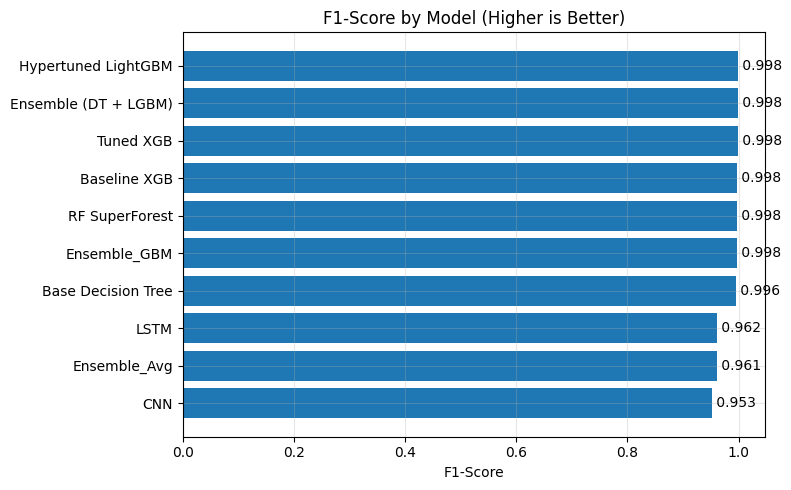

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure consistent types
plot_f1 = comparison_df[['Model','F1_Score']].copy()
plot_f1 = plot_f1.dropna(subset=['F1_Score'])
plot_f1 = plot_f1.sort_values('F1_Score', ascending=True)

plt.figure(figsize=(8, 5))
ypos = np.arange(len(plot_f1))
plt.barh(ypos, plot_f1['F1_Score'])
plt.yticks(ypos, plot_f1['Model'])
plt.xlabel('F1-Score')
plt.title('F1-Score by Model (Higher is Better)')

# annotate bars
for i, v in enumerate(plot_f1['F1_Score'].values):
    plt.text(v, i, f' {v:.3f}', va='center')

plt.tight_layout()
plt.show()


## 7.3 Visualise - Grouped bars for Accuracy / Precision / Recall / F1





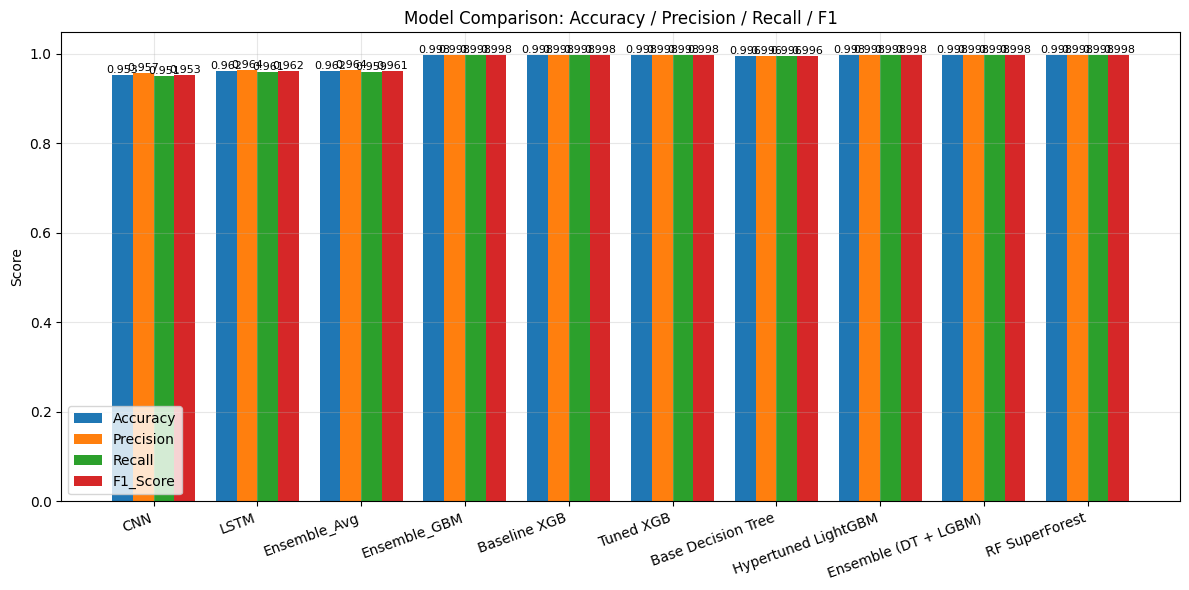

In [41]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Accuracy', 'Precision', 'Recall', 'F1_Score']
plot_df = comparison_df[['Model'] + metrics].copy()

# Drop any rows missing all metrics
plot_df = plot_df.dropna(subset=metrics, how='all')

x = np.arange(len(plot_df['Model']))
width = 0.2  # bar width

plt.figure(figsize=(12, 6))
for idx, m in enumerate(metrics):
    vals = plot_df[m].values
    plt.bar(x + idx*width - (1.5*width), vals, width, label=m)

plt.xticks(x, plot_df['Model'], rotation=20, ha='right')
plt.ylabel('Score')
plt.title('Model Comparison: Accuracy / Precision / Recall / F1')
plt.legend()

# annotate
for idx, m in enumerate(metrics):
    vals = plot_df[m].values
    for i, v in enumerate(vals):
        if np.isfinite(v):
            plt.text(x[i] + idx*width - (1.5*width), v, f'{v:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


## 7.4 Visualise - Heatmap

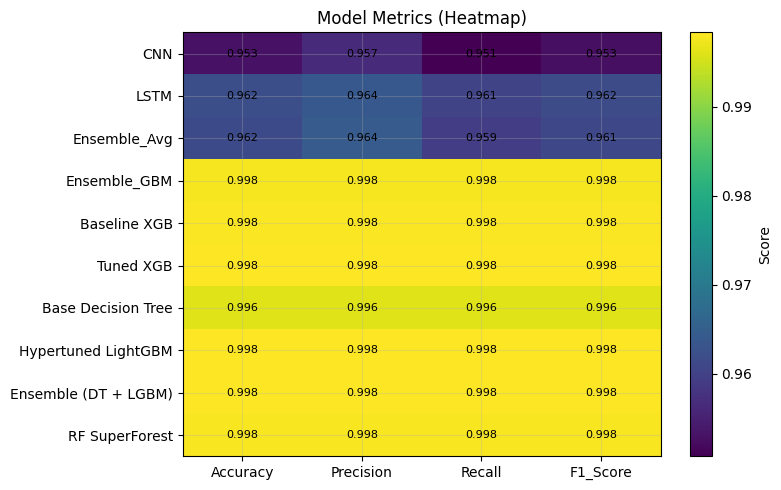

In [42]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Accuracy', 'Precision', 'Recall', 'F1_Score']
heat_df = comparison_df[['Model'] + metrics].copy().set_index('Model')

# Replace NaNs with 0 for display purposes
display_mat = heat_df.fillna(0).values
models = heat_df.index.tolist()

plt.figure(figsize=(8, max(3, 0.5*len(models))))
plt.imshow(display_mat, aspect='auto')
plt.colorbar(label='Score')
plt.yticks(np.arange(len(models)), models)
plt.xticks(np.arange(len(metrics)), metrics, rotation=0)
plt.title('Model Metrics (Heatmap)')

# annotate cells
for i in range(display_mat.shape[0]):
    for j in range(display_mat.shape[1]):
        plt.text(j, i, f'{display_mat[i, j]:.3f}', ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()


## 7.5 Rank Chart

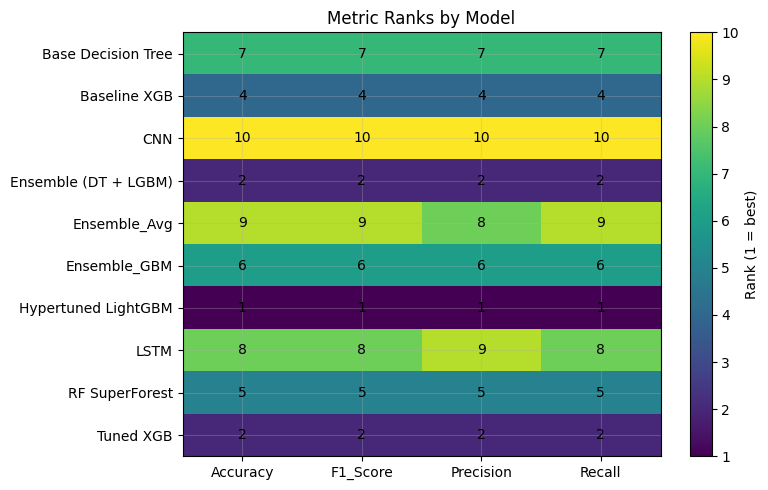

In [45]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Accuracy','Precision','Recall','F1_Score']
rank_df = comparison_df[['Model'] + metrics].copy()

# higher is better → rank 1 = best
for m in metrics:
    rank_df[m] = rank_df[m].rank(ascending=False, method='min')

rank_melt = rank_df.melt(id_vars='Model', value_vars=metrics, var_name='Metric', value_name='Rank')
pivot = rank_melt.pivot(index='Model', columns='Metric', values='Rank')

plt.figure(figsize=(8, max(3, 0.5*len(pivot))))
plt.imshow(pivot.values, aspect='auto')
plt.colorbar(label='Rank (1 = best)')
plt.yticks(np.arange(len(pivot.index)), pivot.index)
plt.xticks(np.arange(len(pivot.columns)), pivot.columns)
plt.title('Metric Ranks by Model')

for i in range(pivot.shape[0]):
    for j in range(pivot.shape[1]):
        plt.text(j, i, f'{int(pivot.values[i, j])}', ha='center', va='center')
plt.tight_layout()
plt.show()
